# Comparison of Royalty Prediction Models per Artist
## Master's Thesis in Data Science
### Autor: Florencia Federico
This notebook consolidates and compares the performance metrics of SARIMAX, XGBoost, Prophet, and LSTM models.  
Metrics such as RMSE and MAPE are analyzed, and visualizations are generated to evaluate the best-performing model for each artist.


In [1]:
import pandas as pd

# Load each model's metrics file
sarimax = pd.read_csv("sarimax_metrics_per_artist.csv")
xgboost = pd.read_csv("xgboost_metrics_per_artist.csv")
prophet = pd.read_csv("prophet_metrics_per_artist.csv")
lstm = pd.read_csv("lstm_metrics_per_artist.csv")

# Combine all into a single DataFrame
df_models = pd.concat([sarimax, xgboost, prophet, lstm], ignore_index=True)
df_models.head()


,Artist_ID,Model,MSE,MAE,RMSE,MAPE
0,436lvfnz,SARIMAX,1.287214e+09,28829.697735,35877.761426,0.187388
1,5jwhbt0o,SARIMAX,4.378150e+07,6138.251995,6616.758662,0.507850
2,5t4iv6o3,SARIMAX,1.434247e+10,112119.755399,119760.042241,0.336492
3,65m1vtnc,SARIMAX,1.976764e+10,133194.468254,140597.433468,0.193277
4,67gc5xm9,SARIMAX,4.174349e+09,58968.899196,64609.203788,0.154696


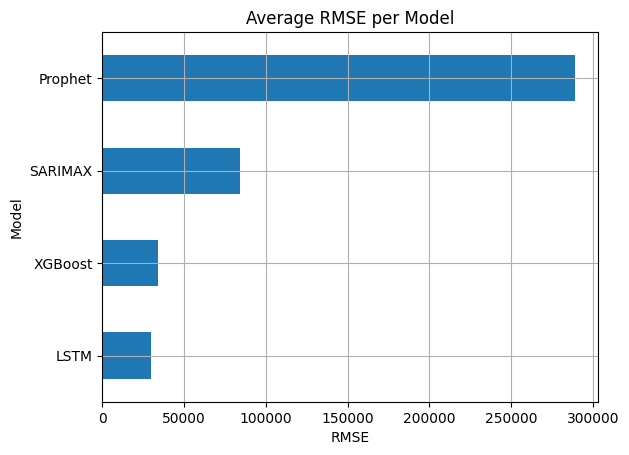

In [2]:
# Average RMSE per model
df_models.groupby("Model")["RMSE"].mean().sort_values().plot(kind="barh", title="Average RMSE per Model")
import matplotlib.pyplot as plt
plt.xlabel("RMSE")
plt.grid(True)
plt.show()


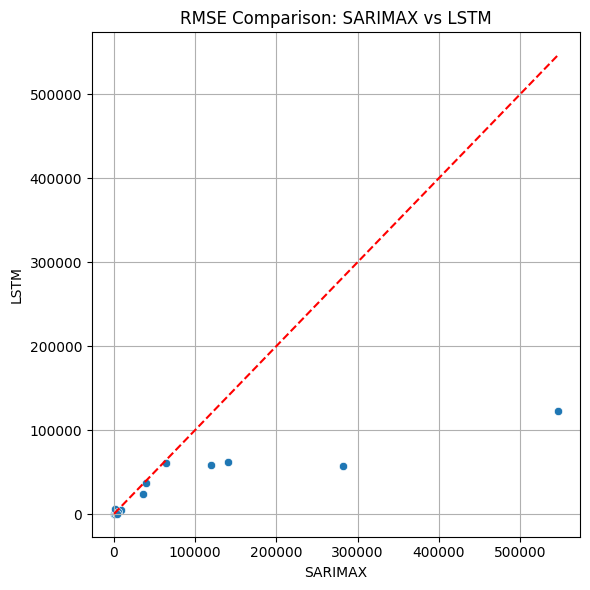

In [3]:
import seaborn as sns

# SARIMAX vs LSTM Comparison
sarimax_rmse = sarimax.set_index("Artist_ID")["RMSE"]
lstm_rmse = lstm.set_index("Artist_ID")["RMSE"]

comparison = pd.DataFrame({
    'SARIMAX': sarimax_rmse,
    'LSTM': lstm_rmse
}).dropna()

plt.figure(figsize=(6,6))
sns.scatterplot(x="SARIMAX", y="LSTM", data=comparison)
plt.plot([comparison.min().min(), comparison.max().max()],
         [comparison.min().min(), comparison.max().max()], 'r--')
plt.title("RMSE Comparison: SARIMAX vs LSTM")
plt.grid(True)
plt.tight_layout()
plt.show()


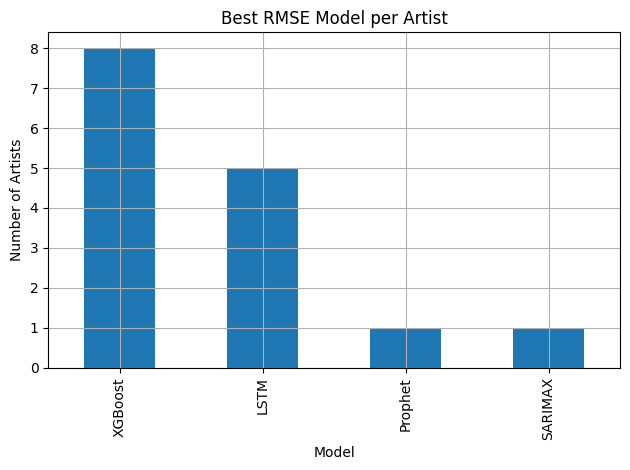

In [4]:
# Best model per artist (lowest RMSE)
best_model = df_models.loc[df_models.groupby("Artist_ID")["RMSE"].idxmin()]
model_counts = best_model["Model"].value_counts()

model_counts.plot(kind="bar", title="Best RMSE Model per Artist")
plt.ylabel("Number of Artists")
plt.grid(True)
plt.tight_layout()
plt.show()


## Average MAPE per model

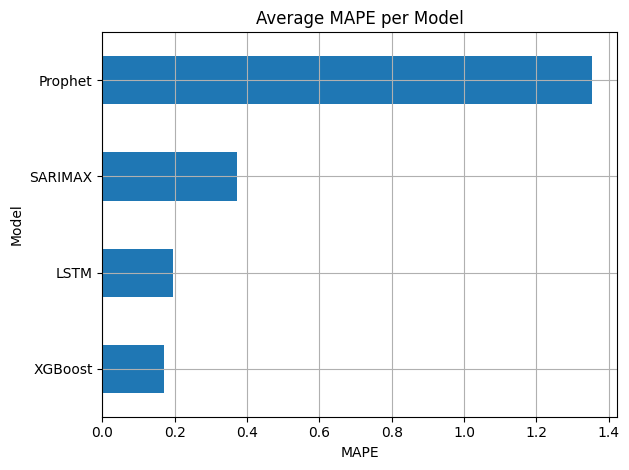

In [5]:
df_models.groupby("Model")["MAPE"].mean().sort_values().plot(
    kind="barh", 
    title="Average MAPE per Model"
)
plt.xlabel("MAPE")
plt.grid(True)
plt.tight_layout()
plt.show()


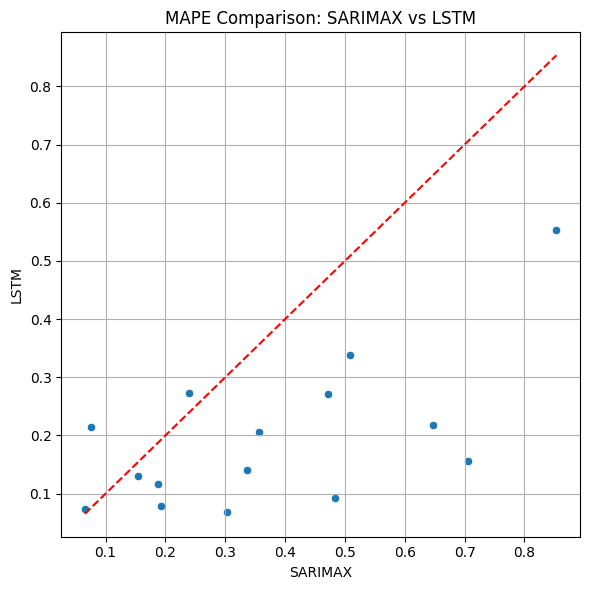

In [6]:
# MAPE Comparison: SARIMAX vs LSTM
sarimax_mape = sarimax.set_index("Artist_ID")["MAPE"]
lstm_mape = lstm.set_index("Artist_ID")["MAPE"]

mape_comparison = pd.DataFrame({
    'SARIMAX': sarimax_mape,
    'LSTM': lstm_mape
}).dropna()

plt.figure(figsize=(6,6))
sns.scatterplot(x="SARIMAX", y="LSTM", data=mape_comparison)
plt.plot(
    [mape_comparison.min().min(), mape_comparison.max().max()],
    [mape_comparison.min().min(), mape_comparison.max().max()],
    'r--'
)
plt.title("MAPE Comparison: SARIMAX vs LSTM")
plt.grid(True)
plt.tight_layout()
plt.show()


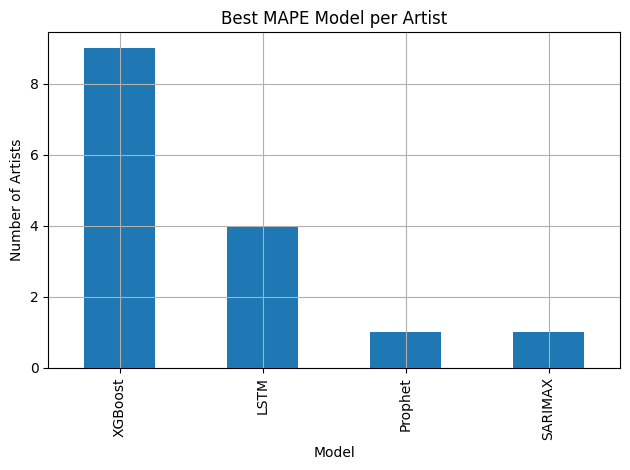

In [7]:
# Best model per artist (lowest MAPE)
best_model_mape = df_models.loc[df_models.groupby("Artist_ID")["MAPE"].idxmin()]
model_counts_mape = best_model_mape["Model"].value_counts()

model_counts_mape.plot(kind="bar", title="Best MAPE Model per Artist")
plt.ylabel("Number of Artists")
plt.grid(True)
plt.tight_layout()
plt.show()


## Overall Ranking per Artist (based on RMSE)

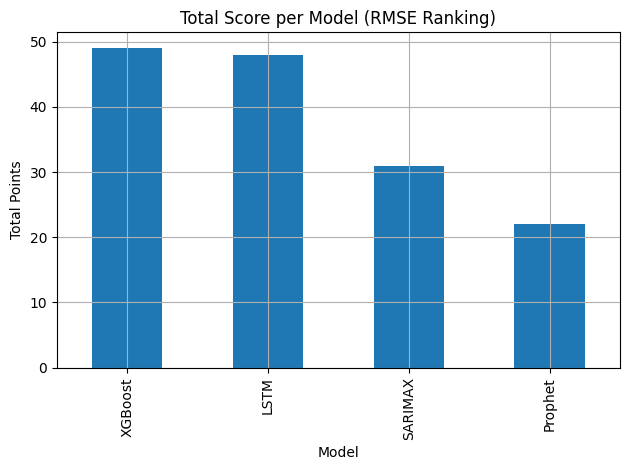

In [8]:
# Assign points by ranking position (lower RMSE = better)
ranking_rmse = df_models.copy()
ranking_rmse["ranking"] = ranking_rmse.groupby("Artist_ID")["RMSE"].rank(method="min")
ranking_rmse["points"] = 5 - ranking_rmse["ranking"]  # 1st place = 4 pts, 4th = 1

# Total points per model
total_points = ranking_rmse.groupby("Model")["points"].sum().sort_values(ascending=False)

# Plot total score by model
total_points.plot(kind="bar", title="Total Score per Model (RMSE Ranking)")
plt.ylabel("Total Points")
plt.grid(True)
plt.tight_layout()
plt.show()


## Consolidated Metrics


In [9]:
# Load the files
sarimax_df = pd.read_csv('sarimax_metrics_per_artist.csv')
lstm_df = pd.read_csv('lstm_metrics_per_artist.csv')
xgboost_df = pd.read_csv('xgboost_metrics_per_artist.csv')
prophet_df = pd.read_csv('prophet_metrics_per_artist.csv')

# Combine all DataFrames
consolidated_df = pd.concat([sarimax_df, lstm_df, xgboost_df, prophet_df], ignore_index=True)

# Save the consolidated DataFrame to an Excel file
consolidated_df.to_csv('consolidated_prediction_models.csv', index=False)


In [10]:
consolidated_df

,Artist_ID,Model,MSE,MAE,RMSE,MAPE
0,436lvfnz,SARIMAX,1.287214e+09,2.882970e+04,3.587776e+04,0.187388
1,5jwhbt0o,SARIMAX,4.378150e+07,6.138252e+03,6.616759e+03,0.507850
2,5t4iv6o3,SARIMAX,1.434247e+10,1.121198e+05,1.197600e+05,0.336492
3,65m1vtnc,SARIMAX,1.976764e+10,1.331945e+05,1.405974e+05,0.193277
4,67gc5xm9,SARIMAX,4.174349e+09,5.896890e+04,6.460920e+04,0.154696
5,6ygz70qs,SARIMAX,8.823890e+07,6.728436e+03,9.393557e+03,0.853348
6,al0gcvtm,SARIMAX,1.601112e+09,2.914601e+04,4.001389e+04,0.065426
7,awrkf92m,SARIMAX,3.037439e+05,4.645199e+02,5.511296e+02,0.238727
8,bpgx7194,SARIMAX,2.985321e+11,4.166785e+05,5.463809e+05,0.705659
9,hfiatnv8,SARIMAX,1.667231e+06,1.048886e+03,1.291213e+03,0.470946


In [11]:
import numpy as np

# Avoid division by zero
consolidated_df['estimated_weight'] = np.where(
    consolidated_df['MAPE'] > 0,
    consolidated_df['MAE'] / consolidated_df['MAPE'],
    0
)

# Normalize weights per model
consolidated_df['normalized_weight'] = consolidated_df.groupby('Model')['estimated_weight'].transform(
    lambda x: x / x.sum()
)

# Compute weighted MAPE
consolidated_df['weighted_MAPE'] = consolidated_df['MAPE'] * consolidated_df['normalized_weight']

# Group and compute final metrics
weighted_summary = consolidated_df.groupby('Model').agg({
    'MSE': 'mean',
    'MAE': 'mean',
    'RMSE': 'mean',
    'weighted_MAPE': 'sum'  # already weighted
}).reset_index()

# Rename column
weighted_summary = weighted_summary.rename(columns={'weighted_MAPE': 'MAPE'})

# Round and export
weighted_summary = weighted_summary.round(6)
#weighted_summary.to_csv('Average_Metrics_per_Model.csv', index=False)


In [12]:
weighted_summary.head()

,Model,MSE,MAE,RMSE,MAPE
0,LSTM,2.095028e+09,25480.381599,29573.306968,0.107606
1,Prophet,4.112369e+11,236606.381486,288953.770886,1.037930
2,SARIMAX,2.797790e+10,68548.152966,84152.201874,0.302434
3,XGBoost,2.868937e+09,29293.736610,34118.498461,0.126391


In [13]:
# Step 1: Get the model with the lowest MAPE per artist
best_model_per_artist = consolidated_df.loc[
    consolidated_df.groupby('Artist_ID')['MAPE'].idxmin()
]

# Step 2: Select key columns
summary_per_artist = best_model_per_artist[[
    'Artist_ID', 'Model', 'MAPE', 'RMSE', 'MAE', 'MSE'
]].reset_index(drop=True)

# (Optional) Rename columns for presentation
summary_per_artist = summary_per_artist.rename(columns={
    'Artist_ID': 'Artist_ID',
    'Model': 'Best_Model',
    'MAPE': 'Lowest_MAPE'
})

# Export
#summary_per_artist.to_csv('Best_Model_Per_Artist.csv', index=False)


In [14]:
summary_per_artist

,Artist_ID,Best_Model,Lowest_MAPE,RMSE,MAE,MSE
0,436lvfnz,LSTM,0.117392,23553.626701,20072.051875,5.547733e+08
1,5jwhbt0o,Prophet,0.195634,2659.129088,2376.568947,7.070968e+06
2,5t4iv6o3,XGBoost,0.134839,46968.057323,45620.152857,2.205998e+09
3,65m1vtnc,LSTM,0.078103,62780.768136,53594.315000,3.941425e+09
4,67gc5xm9,XGBoost,0.124911,57224.791576,49809.278056,3.274677e+09
5,6ygz70qs,XGBoost,0.141398,1291.388927,1132.417157,1.667685e+06
6,al0gcvtm,XGBoost,0.051727,27834.072943,23250.314861,7.747356e+08
7,awrkf92m,XGBoost,0.180768,447.365014,322.840574,2.001355e+05
8,bpgx7194,XGBoost,0.146598,116570.782290,91514.384444,1.358875e+10
9,hfiatnv8,XGBoost,0.257658,683.098561,655.543383,4.666236e+05
